In [ ]:
import os
import cv2
import numpy as np

In [ ]:
def load_and_preprocess_data(folder_path,label):
    images=[]
    labels=[]
    
    for filename in os.listdir(folder_path):
        img_path=os.path.join(folder_path,filename) 
        img=cv2.imread(img_path)
        img=cv2.resize(img,(64,64))
        img=img/255.0
        images.append(img)
        labels.append(label)
    return images,labels

real_images,real_labels=load_and_preprocess_data('dataset/Real',label=0)
fake_images,fake_labels=load_and_preprocess_data('dataset/Fake',label=1)

all_images=np.concatenate([real_images,fake_images],axis=0)
all_labels=np.concatenate([real_labels,fake_labels],axis=0)

In [ ]:
all_images

In [4]:
all_labels

array([0, 0, 0, ..., 1, 1, 1])

In [5]:
# Shapes of the data
print(f"Number of samples: {all_images.shape[0]}")
print(f"Image dimensions: {all_images.shape[1:]}")
print(f"Number of classes: {len(np.unique(all_labels))}")


Number of samples: 20000
Image dimensions: (64, 64, 3)
Number of classes: 2


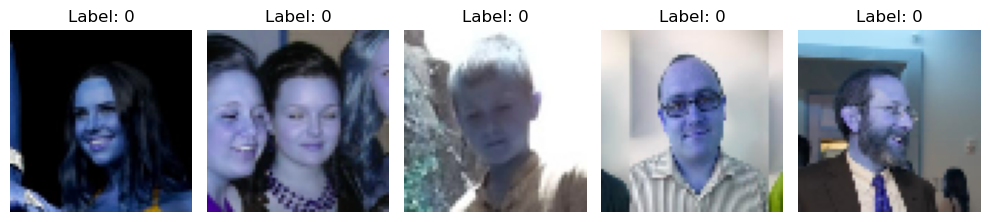

In [6]:
import matplotlib.pyplot as plt

# Display sample images with their labels
plt.figure(figsize=(10, 5))
for i in range(5):  # Displaying 5 sample images
    plt.subplot(1, 5, i + 1)
    plt.imshow(all_images[i])
    plt.title(f"Label: {all_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [9]:
# Image statistics
print(f"Mean pixel value: {np.mean(all_images)}")
print(f"Standard deviation: {np.std(all_images)}")
print(f"Minimum pixel value: {np.min(all_images)}")
print(f"Maximum pixel value: {np.max(all_images)}")


Mean pixel value: 0.39713741317848783
Standard deviation: 0.27132512944948706
Minimum pixel value: 0.0
Maximum pixel value: 1.0


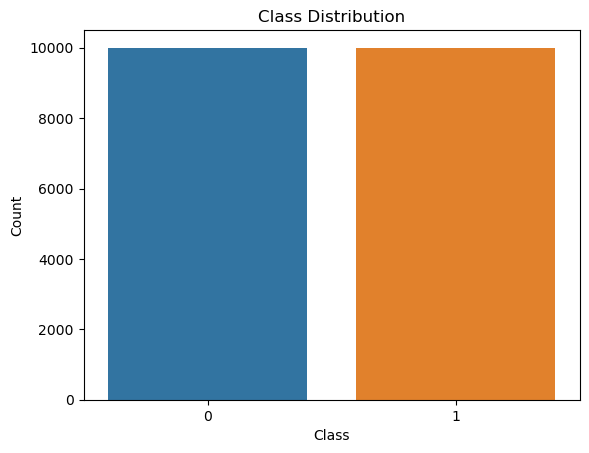

In [8]:
import seaborn as sns

# Count plot for class distribution
sns.countplot(x=all_labels)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [10]:
# Check unique image shapes
unique_shapes = np.unique([img.shape for img in all_images], axis=0)
print("Unique image shapes:", unique_shapes)


Unique image shapes: [[64 64  3]]


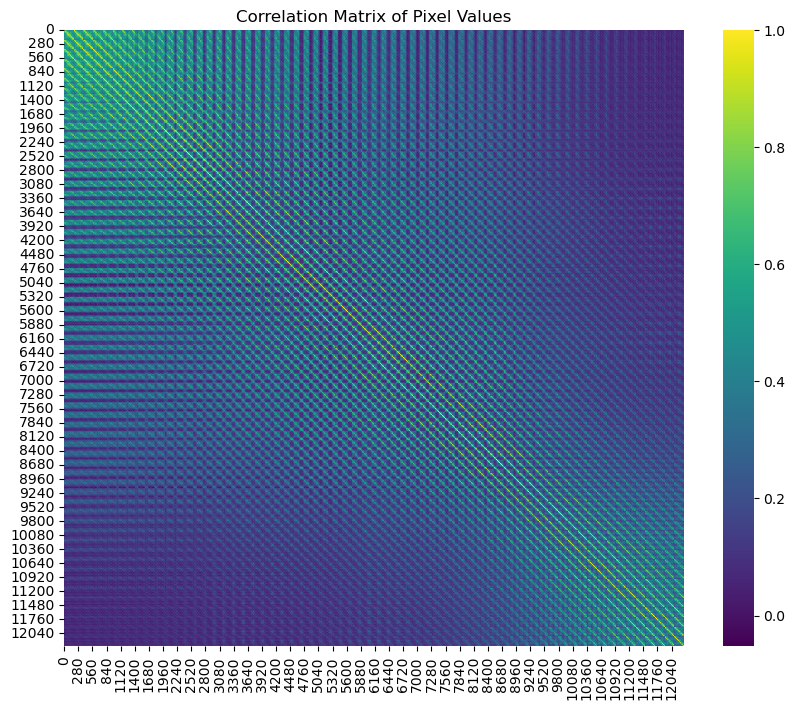

In [11]:
# Calculate correlation matrix for pixel values
correlation_matrix = np.corrcoef(all_images.reshape(all_images.shape[0], -1).T)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='viridis')
plt.title('Correlation Matrix of Pixel Values')
plt.show()


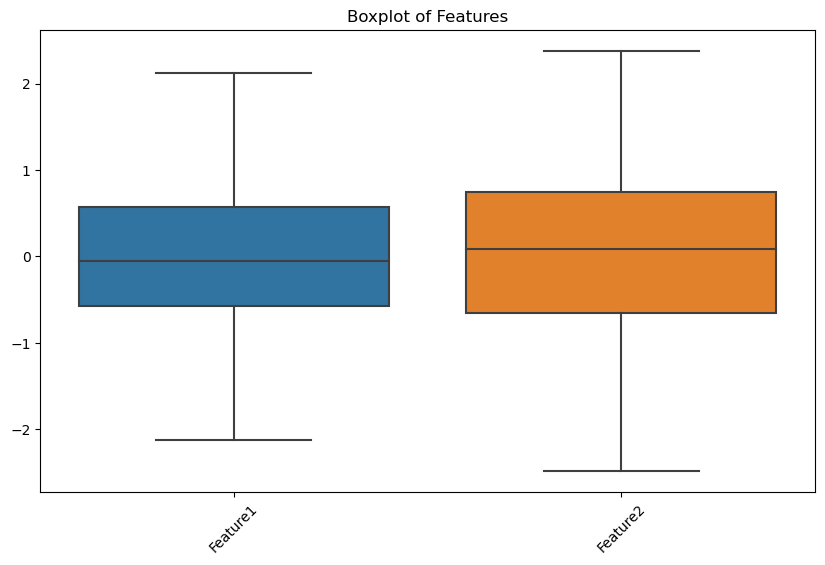

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Creating a sample DataFrame
data = {
    'Feature1': np.random.normal(0, 1, 100),  # Generating random data for Feature1
    'Feature2': np.random.normal(0, 1, 100),  # Generating random data for Feature2
    # Add more columns as needed
}

df = pd.DataFrame(data)

# Creating boxplots for numerical features in the DataFrame 'df'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()


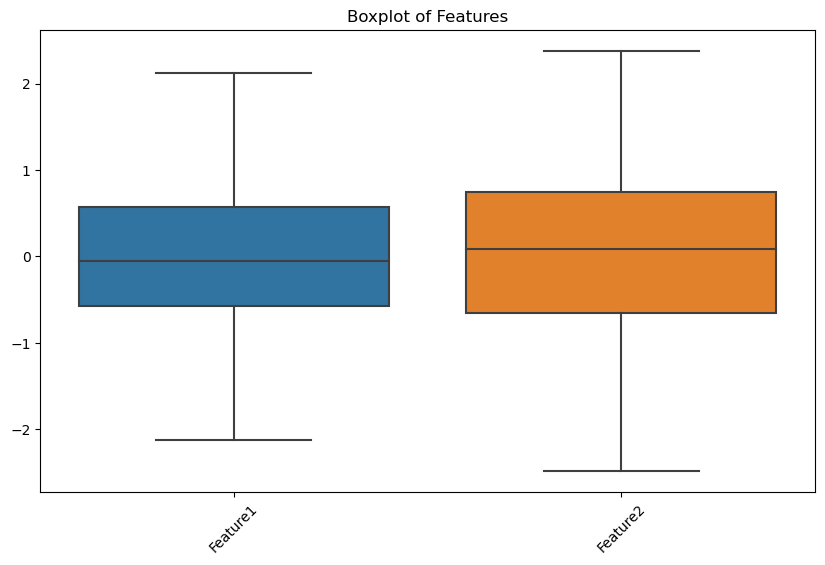

In [17]:
# Create boxplots for numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()


In [18]:
# Assuming 'df' is your DataFrame containing feature variables
feature_stats = df.describe()
print(feature_stats)


         Feature1    Feature2
count  100.000000  100.000000
mean    -0.021497    0.099222
std      0.925820    0.967058
min     -2.123313   -2.484566
25%     -0.575769   -0.651777
50%     -0.055415    0.082429
75%      0.570273    0.744855
max      2.123539    2.377822


C:\Users\aryam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


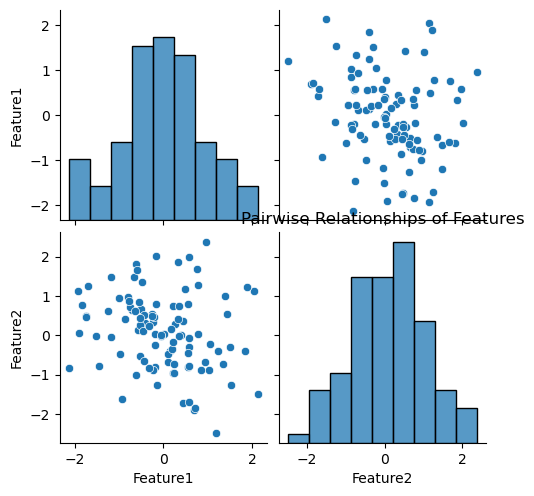

In [19]:
# Create a pairplot to visualize pairwise relationships between numerical features
sns.pairplot(df)
plt.title('Pairwise Relationships of Features')
plt.show()


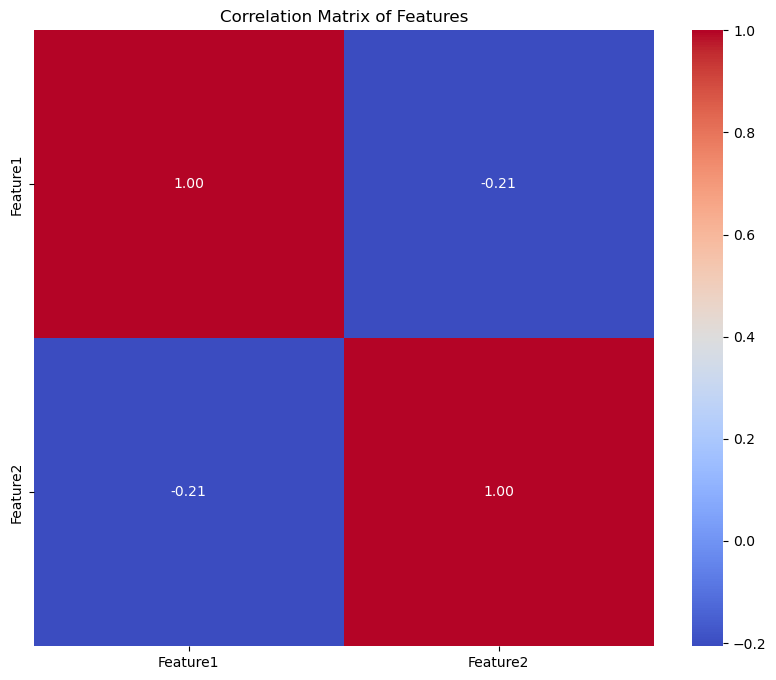

In [21]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


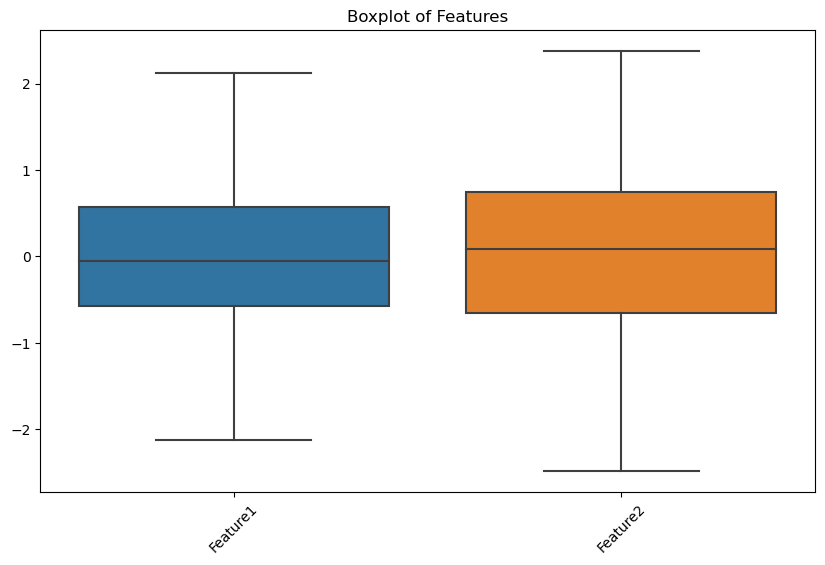

In [20]:
# Create boxplots for numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()


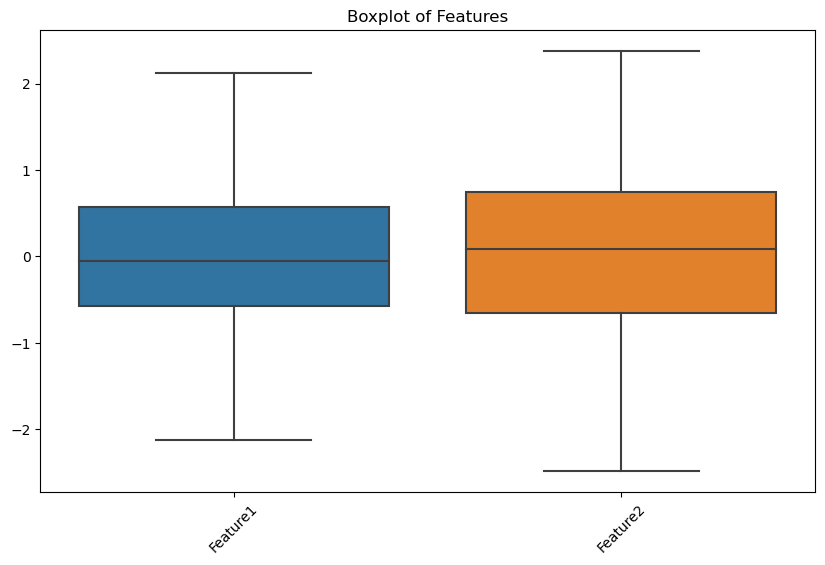

In [22]:
# Create boxplots for numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()


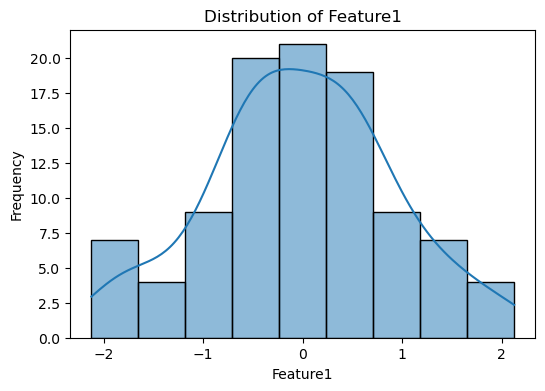

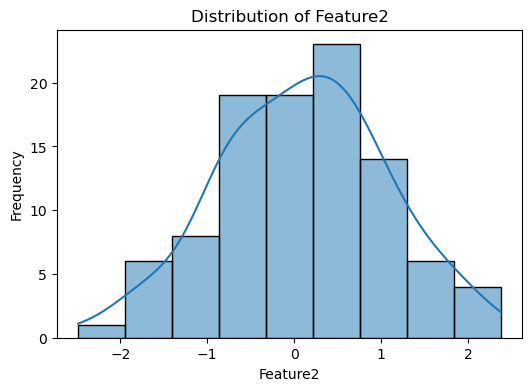

In [23]:
# Plot histograms for numerical features
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()


NameError: name 'class_counts' is not defined

<Figure size 800x600 with 0 Axes>

KeyError: 'class_column'

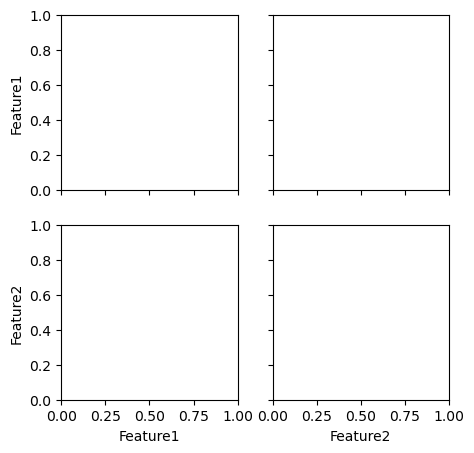

In [25]:
import seaborn as sns

# Pairplot with hue as class_column
sns.pairplot(df, hue='class_column')
plt.title('Pairwise Relationships with Class Variable')
plt.show()


In [24]:
# Assuming 'cat_column' is the categorical feature column
plt.figure(figsize=(8, 6))
sns.countplot(x='cat_column', data=df)
plt.title('Count Plot of Categorical Feature')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()


ValueError: Could not interpret input 'cat_column'

<Figure size 800x600 with 0 Axes>

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the pre-trained layers so they're not trainable
for layer in base_model.layers:
    layer.trainable = False

# Add your own classification layers on top of the pre-trained model
x = Flatten()(base_model.output) 
x = Dense(256, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/20
500/500 [==============================] - 840s 2s/step - loss: 0.5056 - accuracy: 0.7512 - val_loss: 0.4798 - val_accuracy: 0.7717
Epoch 2/20
500/500 [==============================] - 860s 2s/step - loss: 0.4582 - accuracy: 0.7807 - val_loss: 0.4684 - val_accuracy: 0.7730
Epoch 3/20
500/500 [==============================] - 885s 2s/step - loss: 0.4394 - accuracy: 0.7919 - val_loss: 0.4636 - val_accuracy: 0.7797
Epoch 4/20
500/500 [==============================] - 755s 2s/step - loss: 0.4249 - accuracy: 0.7989 - val_loss: 0.4705 - val_accuracy: 0.7822
Epoch 5/20
500/500 [==============================] - 794s 2s/step - loss: 0.4122 - accuracy: 0.8087 - val_loss: 0.4678 - val_accuracy: 0.7797
Epoch 6/20
500/500 [==============================] - 673s 1s/step - loss: 0.3968 - accuracy: 0.8162 - val_loss: 0.4667 - val_accuracy: 0.7830
Epoch 7/20
500/500 [==============================] - 728s 1s/step - loss: 0.3853 - accuracy: 0.8230 - val_loss: 0.4746 - val_accuracy: 0.7840

In [8]:
# Save the model
model.save('my_image_classifier_model.h5')

C:\Users\aryam\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
from tensorflow.keras.models import load_model

loaded_model = load_model('my_image_classifier_model.h5')